<a href="https://colab.research.google.com/github/MarianaLeonS/Sustainable-Logistics/blob/main/Session_1_Sudoku_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sudoku problem - Solution

In [ ]:
!pip3 install ortools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sudoku(solution):
    """
    Plots the solution to the Sudoku puzzle.
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.matshow(solution, cmap='Blues')

    for i in range(9):
        for j in range(9):
            ax.text(j, i, str(solution[i, j]), va='center', ha='center', fontsize=12)

    for i in range(1, 9):
        if i % 3 == 0:
            ax.axhline(i - 0.5, color='black', linewidth=2)
            ax.axvline(i - 0.5, color='black', linewidth=2)
        else:
            ax.axhline(i - 0.5, color='gray', linewidth=1)
            ax.axvline(i - 0.5, color='gray', linewidth=1)

    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In this part of the code, we’re iterating over each 3x3 cell in the Sudoku grid. The outer two loops (for i in cell: and for j in cell:) iterate over the 3x3 cells. For each cell, we create an empty list one_cell.

The inner two loops (for di in cell: and for dj in cell:) iterate over the individual cells within the current 3x3 cell. For each individual cell, we append the corresponding variable from the grid dictionary to the one_cell list.

i: 0
j: 0
(di, dj): (0,0)
cell: 0, 0 
(di, dj): (0,1)
cell: 0, 1 
(di, dj): (0,2)
cell: 0, 2 
(di, dj): (1,0)
cell: 1, 0 
(di, dj): (1,1)
cell: 1, 1 
(di, dj): (1,2)
cell: 1, 2 
(di, dj): (2,0)
cell: 2, 0 
(di, dj): (2,1)
cell: 2, 1 
(di, dj): (2,2)
cell: 2, 2 
j: 1
(di, dj): (0,0)
cell: 0, 3 
(di, dj): (0,1)
cell: 0, 4 
(di, dj): (0,2)
cell: 0, 5 
(di, dj): (1,0)
cell: 1, 3 
(di, dj): (1,1)
cell: 1, 4 
(di, dj): (1,2)
cell: 1, 5 
(di, dj): (2,0)
cell: 2, 3 
(di, dj): (2,1)
cell: 2, 4 
(di, dj): (2,2)
cell: 2, 5 
j: 2
(di, dj): (0,0)
cell: 0, 6 
(di, dj): (0,1)
cell: 0, 7 
(di, dj): (0,2)
cell: 0, 8 
(di, dj): (1,0)
cell: 1, 6 
(di, dj): (1,1)
cell: 1, 7 
(di, dj): (1,2)
cell: 1, 8 
(di, dj): (2,0)
cell: 2, 6 
(di, dj): (2,1)
cell: 2, 7 
(di, dj): (2,2)
cell: 2, 8 
i: 1
j: 0
(di, dj): (0,0)
cell: 3, 0 
(di, dj): (0,1)
cell: 3, 1 
(di, dj): (0,2)
cell: 3, 2 
(di, dj): (1,0)
cell: 4, 0 
(di, dj): (1,1)
cell: 4, 1 
(di, dj): (1,2)
cell: 4, 2 
(di, dj): (2,0)
cell: 5, 0 
(di, dj): (2,1)
ce

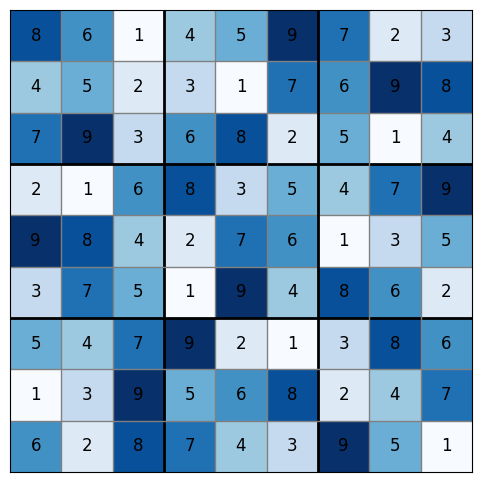

In [ ]:
from ortools.sat.python import cp_model


def solve_sudoku():
    """Solves the sudoku problem with the CP-SAT solver."""
    # Create the model.
    model = cp_model.CpModel()

    cell_size = 3
    line_size = cell_size**2
    line = list(range(0, line_size))
    cell = list(range(0, cell_size))

    initial_grid = [[0, 6, 0, 0, 5, 0, 0, 2, 0], [0, 0, 0, 3, 0, 0, 0, 9, 0],
                    [7, 0, 0, 6, 0, 0, 0, 1, 0], [0, 0, 6, 0, 3, 0, 4, 0, 0],
                    [0, 0, 4, 0, 7, 0, 1, 0, 0], [0, 0, 5, 0, 9, 0, 8, 0, 0],
                    [0, 4, 0, 0, 0, 1, 0, 0, 6], [0, 3, 0, 0, 0, 8, 0, 0, 0],
                    [0, 2, 0, 0, 4, 0, 0, 5, 0]]

    grid = {}
    for i in line:
        for j in line:
            grid[(i, j)] = model.NewIntVar(1, line_size, 'grid %i %i' % (i, j))

    # AllDifferent on rows.
    for i in line:
        model.AddAllDifferent(grid[(i, j)] for j in line)

    # AllDifferent on columns.
    for j in line:
        model.AddAllDifferent(grid[(i, j)] for i in line)

    # AllDifferent on cells.
    for i in cell:
        for j in cell:
            one_cell = []
            for di in cell:
                for dj in cell:
                    one_cell.append(grid[(i * cell_size + di,
                                          j * cell_size + dj)])

            model.AddAllDifferent(one_cell)

    # Initial values.
    for i in line:
        for j in line:
            if initial_grid[i][j]:
                model.Add(grid[(i, j)] == initial_grid[i][j])

    # Solve and print out the solution.
    solver = cp_model.CpSolver()
    status = solver.Solve(model)
    if status == cp_model.OPTIMAL:
        solution = np.zeros((9, 9), dtype=int)
        for i in line:
            for j in line:
                solution[i, j] = solver.Value(grid[(i, j)])
        plot_sudoku(solution)


solve_sudoku()